In [1]:
import torch

from model import GradKNN
from configs.config import config

In [2]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print(f"Using device: {device}")

Using device: cuda


In [3]:
from utils.other import GradKNNDataloader

data_loader = GradKNNDataloader(num_tasks=6, dataset_name="imagenet-r", load_covariances=True, load_prototypes=False)
model = GradKNN(config, device=device)

for i in range(6):
    X_train, y_train, X_test, y_test, covariances, prototypes = data_loader.get_data(i)
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    acc = (torch.sum((y_test.flatten().to(device) == predictions).int()) / X_test.shape[0] * 100).item()
    print(f"Accuracy: {acc} MY\n")

Epoch [1|50] Loss: 3.0031361733713458 (in this regularization: 0.0) ||| Validation Loss: 3.0022478699684143, Val accuracy: 0.0
Epoch [2|50] Loss: 3.0022222995758057 (in this regularization: 0.0) ||| Validation Loss: 3.0014511942863464, Val accuracy: 0.0
Epoch [3|50] Loss: 3.001357424643732 (in this regularization: 0.0) ||| Validation Loss: 3.000644773244858, Val accuracy: 0.0
Epoch [4|50] Loss: 3.0005141996568248 (in this regularization: 0.0) ||| Validation Loss: 2.9998411536216736, Val accuracy: 0.0
Epoch [5|50] Loss: 2.9996558081719185 (in this regularization: 0.0) ||| Validation Loss: 2.9990297853946686, Val accuracy: 0.0
Epoch [6|50] Loss: 2.9988015467120754 (in this regularization: 0.0) ||| Validation Loss: 2.9982123970985413, Val accuracy: 0.0
Epoch [7|50] Loss: 2.9979379330911944 (in this regularization: 0.0) ||| Validation Loss: 2.997398465871811, Val accuracy: 0.0
Epoch [8|50] Loss: 2.9970805414261354 (in this regularization: 0.0) ||| Validation Loss: 2.996585100889206, Val ac

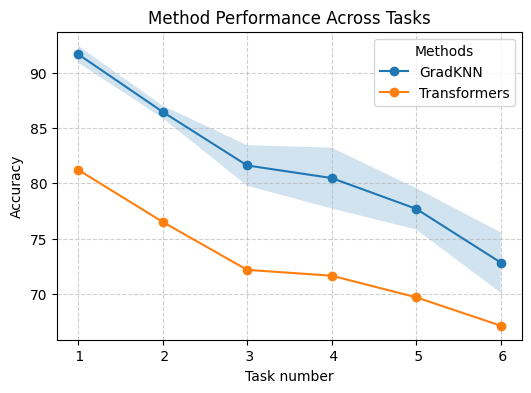

In [4]:
import pandas as pd
from utils.draw_plot import plot_method_scores

plot_method_scores(pd.read_csv("./data/example_chart_data.csv"))